In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df.rename(columns={'yrs.service':'yrs_service','yrs.since.phd':'yrs_since_phd'},inplace=True)
df


,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.shape

(397, 6)

In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs_since_phd', 'yrs_service', 'sex', 'salary'], dtype='object')

In [8]:
df.dtypes

rank             object
discipline       object
yrs_since_phd     int64
yrs_service       int64
sex              object
salary            int64
dtype: object

In [9]:
df.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [10]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


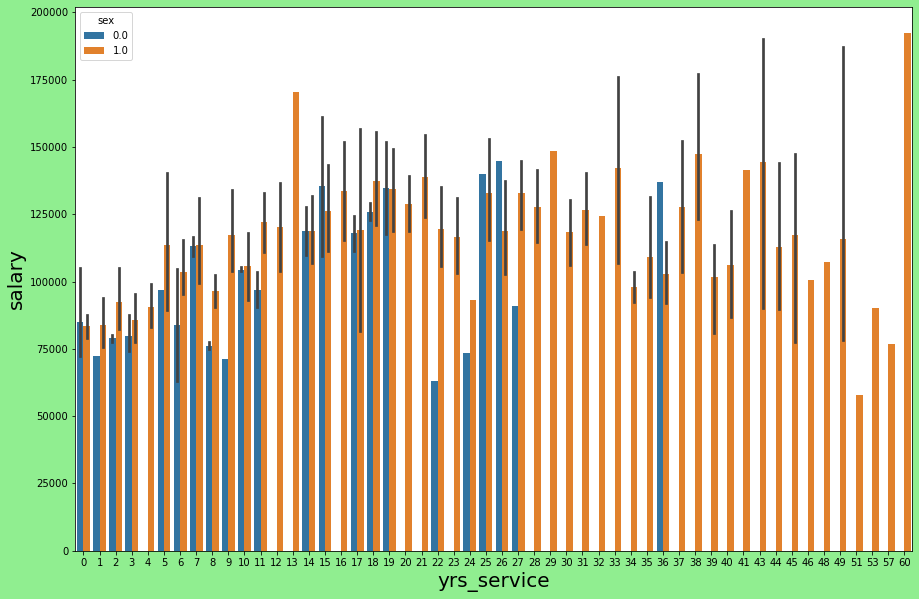

In [11]:
plt.figure(figsize=(15,10),facecolor='lightgreen')
sns.barplot(x='yrs_service',y='salary',data=df,hue='sex')
plt.xlabel('yrs_service',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.show()

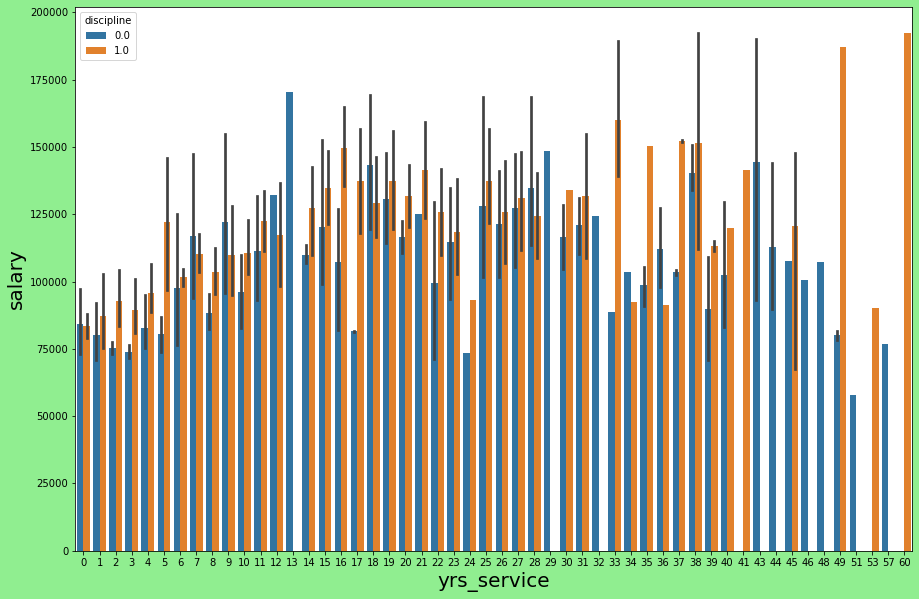

In [12]:
#lets visualize and analyse the data

plt.figure(figsize=(15,10),facecolor='lightgreen')
sns.barplot(x='yrs_service',y='salary',data=df,hue='discipline')
plt.xlabel('yrs_service',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.show()

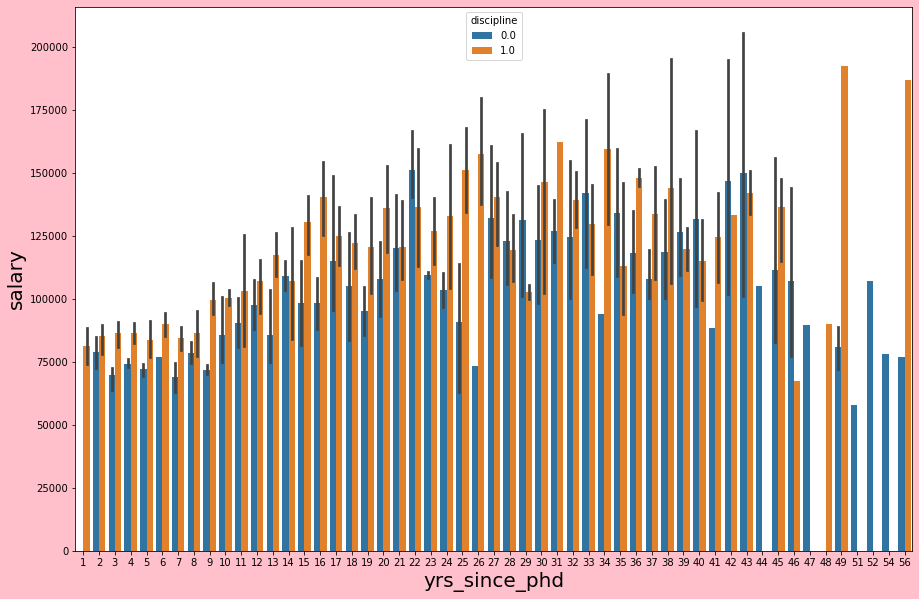

In [13]:
#lets visualize and analyse the data

plt.figure(figsize=(15,10),facecolor='pink')
sns.barplot(x='yrs_since_phd',y='salary',data=df,hue='discipline')
plt.xlabel('yrs_since_phd',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.show()

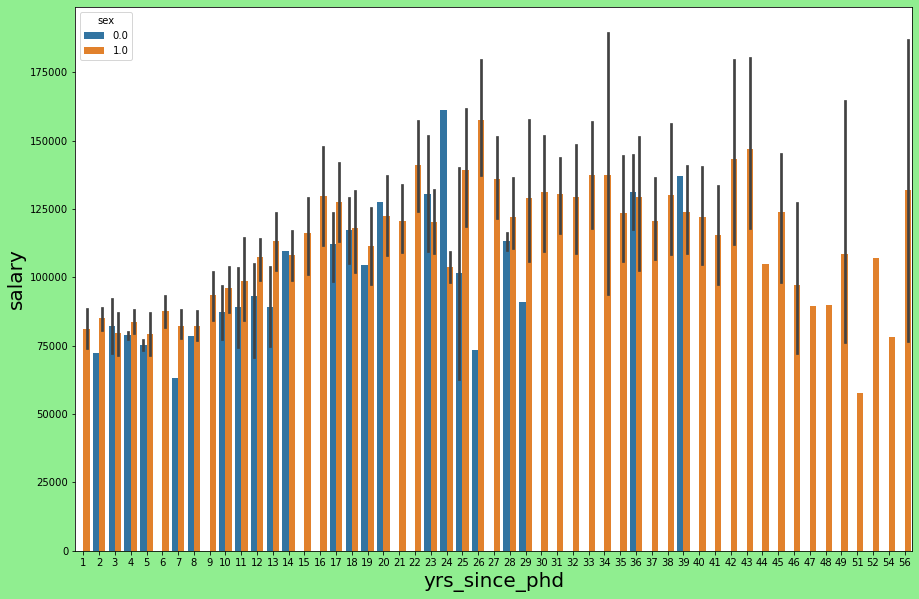

In [14]:
#lets visualize and analyse the data

plt.figure(figsize=(15,10),facecolor='lightgreen')
sns.barplot(x='yrs_since_phd',y='salary',data=df,hue='sex')
plt.xlabel('yrs_since_phd',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.show()

In [15]:
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [16]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs_since_phd    0.300880
yrs_service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [17]:
#rank and sex column has skewed data,rest data is fine,so as we dont remove skewness of categorical data,we will move ahead with data.

In [18]:
y = df['salary']
X = df.drop(columns=['salary'])

<AxesSubplot:>

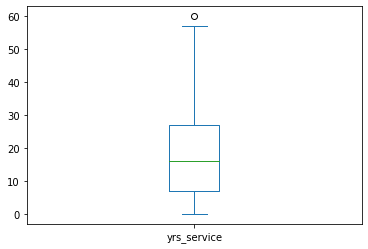

In [19]:
#lets see if their is any outlier by visualization 
X['yrs_service'].plot.box()


<AxesSubplot:>

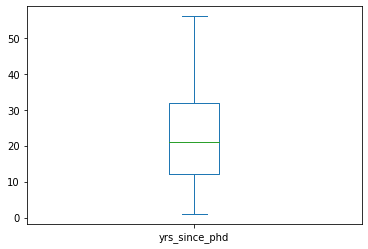

In [20]:
X['yrs_since_phd'].plot.box()

In [21]:
q1=df.quantile(0.25)

In [22]:
q3=df.quantile(0.75)

In [23]:
iqr=q3-q1

In [24]:
yrsserv_high=(q3.yrs_service + (1.5 * iqr.yrs_service))

In [25]:
index = np.where(df['yrs_service'] >yrsserv_high)
index

(array([330], dtype=int64),)

In [26]:
df = df.drop(df.index[index])
df.shape

(396, 6)

In [27]:
df.reset_index()

,index,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,0,2.0,1.0,19,18,1.0,139750
1,1,2.0,1.0,20,16,1.0,173200
2,2,1.0,1.0,4,3,1.0,79750
3,3,2.0,1.0,45,39,1.0,115000
4,4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...,...
391,392,2.0,0.0,33,30,1.0,103106
392,393,2.0,0.0,31,19,1.0,150564
393,394,2.0,0.0,42,25,1.0,101738
394,395,2.0,0.0,25,15,1.0,95329


In [28]:
np.abs(3)

3

In [29]:
np.abs(-3)

3

In [34]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

rank              True
discipline        True
yrs_since_phd     True
yrs_service      False
sex              False
dtype: bool

In [35]:
y = df['salary']
X = df.drop(columns=['salary'])

In [36]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 396, dtype: int64

In [37]:
X

,rank,discipline,yrs_since_phd,yrs_service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [43]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [88]:
X_scaled.shape[1]

5

In [89]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.592866,rank
1,1.103110,discipline
2,1.325401,yrs_service
3,1.034592,sex
4,1.496148,salary


In [90]:

X = df.drop(columns=['yrs_since_phd'])
X

,rank,discipline,yrs_service,sex,salary
0,2.0,1.0,18,1.0,139750
1,2.0,1.0,16,1.0,173200
2,1.0,1.0,3,1.0,79750
3,2.0,1.0,39,1.0,115000
4,2.0,1.0,41,1.0,141500
...,...,...,...,...,...
392,2.0,0.0,30,1.0,103106
393,2.0,0.0,19,1.0,150564
394,2.0,0.0,25,1.0,101738
395,2.0,0.0,15,1.0,95329


In [91]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.592866,rank
1,1.103110,discipline
2,1.325401,yrs_service
3,1.034592,sex
4,1.496148,salary


In [92]:
regression=LinearRegression()

In [93]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    regression.fit(x_train,y_train)
    pred_train = regression.predict(x_train)
    pred_test= regression.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-1.0
At random state0,the testing accuracy is:-1.0


At random state1,the training accuracy is:-1.0
At random state1,the testing accuracy is:-1.0


At random state2,the training accuracy is:-1.0
At random state2,the testing accuracy is:-1.0


At random state3,the training accuracy is:-1.0
At random state3,the testing accuracy is:-1.0


At random state4,the training accuracy is:-1.0
At random state4,the testing accuracy is:-1.0


At random state5,the training accuracy is:-1.0
At random state5,the testing accuracy is:-1.0


At random state6,the training accuracy is:-1.0
At random state6,the testing accuracy is:-1.0


At random state7,the training accuracy is:-1.0
At random state7,the testing accuracy is:-1.0


At random state8,the training accuracy is:-1.0
At random state8,the testing accuracy is:-1.0


At random state9,the training accuracy is:-1.0
At random state9,the testing accuracy is:-1.0


At random state10,the training accuracy is:-1.0
At

In [94]:
x_train.shape

(316, 5)

In [95]:
y_train.shape

(316,)

In [96]:
x_test.shape

(80, 5)

In [97]:
 x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=40)
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=regression.predict(x_test)
y_train.head()

308     74000
0      139750
146     92000
324    162221
289     74000
Name: salary, dtype: int64

In [99]:
df.head(5)

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


In [100]:
#since we already fit the data,now we can transform the data
print('salary:',regression.predict(scaler.transform([[2.0,1.0,19,18,1.0]])))

salary: [1.]


In [103]:
#Adjusted R2 score
regression.score(x_train,y_train)

1.0

In [104]:
regression.score(x_test,y_test)

1.0

In [105]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([106608., 136000., 193000., 117555.,  72500., 181257., 150000.,
       117704., 101299., 189409., 115000., 109305., 153303., 104121.,
       231545., 101210., 101000., 141500., 134885., 124750., 152664.,
        72300.,  73800., 100522., 130664.,  80139.,  98510., 129000.,
        82099., 135027., 144050.,  69200., 134000.,  73000.,  88000.,
       105000., 128464.,  73000., 175000.,  72500., 107986.,  74856.,
       111751., 107500., 115800.,  93519., 134550., 132825., 140300.,
       150564.,  77700., 105350., 114596., 165000., 108875.,  70000.,
        89942., 122400., 138000., 136500.,  78000., 140096., 109785.,
        77081., 103106., 152500., 100102.,  77500., 168500.,  83600.,
       113068.,  81500., 116450., 176500.,  91412.,  92000., 126431.,
       109707.,  81800., 128250.])

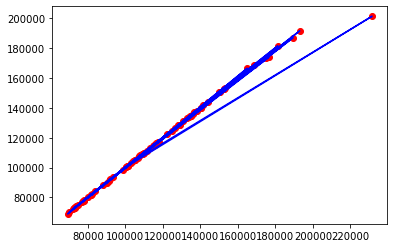

In [152]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_pred,color='b')
plt.xlabel='actual salary'
plt.ylabel='Predicted salary'
plt.title='Actual vs model predicted '
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [108]:
 mean_squared_error(y_test,y_pred)

5.743942173568224e-22

In [109]:
mean_absolute_error(y_test,y_pred)

1.6552803572267293e-11

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.3966522846604643e-11

In [111]:
#regularization to chk whether model is overfitting or not

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [112]:
lasscv = LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [113]:
alpha =lasscv.alpha_
alpha

1.637302037464984

In [114]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.637302037464984)

In [115]:
lasso_reg.score(x_test,y_test)

0.9999999965938348

In [116]:
#RidgeCV
ridgecv =RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [117]:

ridgecv.alpha_

0.001

In [118]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [119]:
ridge_model.score(x_test,y_test)

0.9999999999847019

In [131]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(ridge_model,X,y,cv=5)
print("cross validation score of linear regression model:",scr1.mean())

cross validation score of linear regression model: 1.0


In [121]:
scr1

array([1., 1., 1., 1.])

In [128]:
from sklearn.model_selection import cross_val_score

scr2=cross_val_score(ridge_model,X,y,cv=5)
print("cross validation score of ridge model:",scr2.mean())

cross validation score of ridge model: 1.0


In [129]:
from sklearn.model_selection import cross_val_score

scr3=cross_val_score(lasso_reg,X,y,cv=5)
print("cross validation score of lasso model:",scr3.mean())

cross validation score of lasso model: 1.0


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
abc=GridSearchCV(rf,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [135]:
rf=RandomForestRegressor(criterion= 'mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 98.94222345534172
cross val score: 99.68004963614709


In [ ]:
#saving the model to local file system
filename='salarypediction.pickle'
pickle.dump(regression,open(filename,'wb'))


In [124]:
#so,as randomforestregressor is performing better...we will go ahead with this

In [ ]:
.....#..........................................................THANKS.......................................................................